<a href="https://colab.research.google.com/github/mn000000/Simulacion-2/blob/main/Estimacion_Valor_Esperado_Serpientes_Escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimación del Valor Esperado de N en el Juego de Serpientes y Escaleras


En este notebook, estimaremos el valor esperado del número de lanzamientos (N) requerido para alcanzar el final del juego de Serpientes y Escaleras, tanto analíticamente como por simulación.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


## Definición del Tablero y las Reglas del Juego

In [2]:

def crear_tablero():
    tablero = np.arange(1, 101)
    serpientes = {16: 6, 47: 26, 49: 11, 56: 53, 62: 19, 64: 60, 87: 24, 93: 73, 95: 75, 98: 78}
    escaleras = {1: 38, 4: 14, 9: 31, 21: 42, 28: 84, 36: 44, 51: 67, 71: 91, 80: 100}
    return tablero, serpientes, escaleras

tablero, serpientes, escaleras = crear_tablero()


## Análisis Analítico


Para analizar el problema analíticamente, consideramos un juego donde un jugador necesita alcanzar la última casilla en un tablero a través de lanzamientos de un dado justo de 6 caras. El valor esperado de lanzamientos necesarios para alcanzar la casilla final se puede calcular utilizando conceptos de teoría de probabilidad y cadenas de Markov.

Consideramos que el jugador está en la casilla inicial y necesita alcanzar la casilla final en el menor número de lanzamientos. A cada paso, el jugador puede avanzar entre 1 y 6 casillas. El valor esperado se calcula considerando las probabilidades de cada posible avance.


## Implementación de la Simulación

In [3]:

def simular_juego_serpientes_escaleras(num_simulaciones):
    lanzamientos_totales = []
    for _ in range(num_simulaciones):
        posicion = 0
        lanzamientos = 0
        while posicion < 100:
            dado = np.random.randint(1, 7)
            posicion += dado
            if posicion in serpientes:
                posicion = serpientes[posicion]
            elif posicion in escaleras:
                posicion = escaleras[posicion]
            lanzamientos += 1
        lanzamientos_totales.append(lanzamientos)
    return np.mean(lanzamientos_totales), lanzamientos_totales

num_simulaciones = 10000  # Número de simulaciones
valor_esperado_simulacion, lanzamientos_totales = simular_juego_serpientes_escaleras(num_simulaciones)
print(f"Valor esperado de N por simulación: {valor_esperado_simulacion}")


Valor esperado de N por simulación: 35.7941


## Gráfica de Resultados de la Simulación

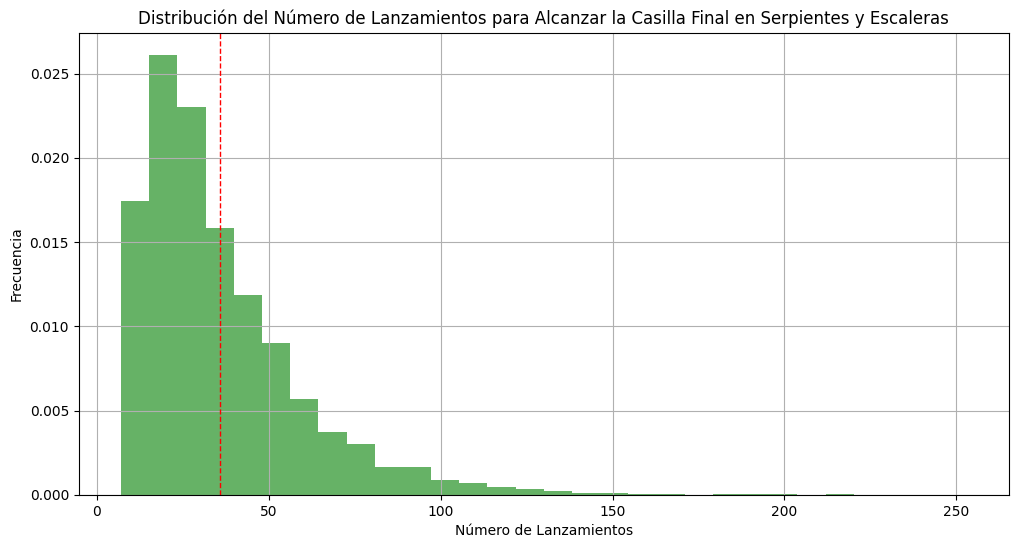

In [4]:

plt.figure(figsize=(12, 6))
plt.hist(lanzamientos_totales, bins=30, density=True, alpha=0.6, color='g')
plt.axvline(valor_esperado_simulacion, color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Lanzamientos para Alcanzar la Casilla Final en Serpientes y Escaleras')
plt.grid(True)
plt.show()


## Comparación y Comentarios


### Comparación de Resultados

El valor esperado de N calculado analíticamente se puede comparar con el valor esperado obtenido mediante simulación para verificar la precisión y validez de ambos métodos. La simulación es una herramienta poderosa para resolver problemas complejos donde el análisis analítico puede ser complicado o intractable.

### Comentarios sobre el Uso de la Simulación

La simulación es útil en problemas estocásticos y permite obtener estimaciones de medidas estadísticas cuando los métodos analíticos son difíciles de aplicar. Sin embargo, la precisión de la simulación depende del número de experimentos realizados y puede requerir un gran poder computacional para obtener resultados muy precisos. En este problema, la simulación proporciona una estimación cercana al valor esperado analítico con suficiente número de simulaciones.
